In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from model.velocity_and_position.base import *
from model.velocity_and_position import baseline
from plot import plot

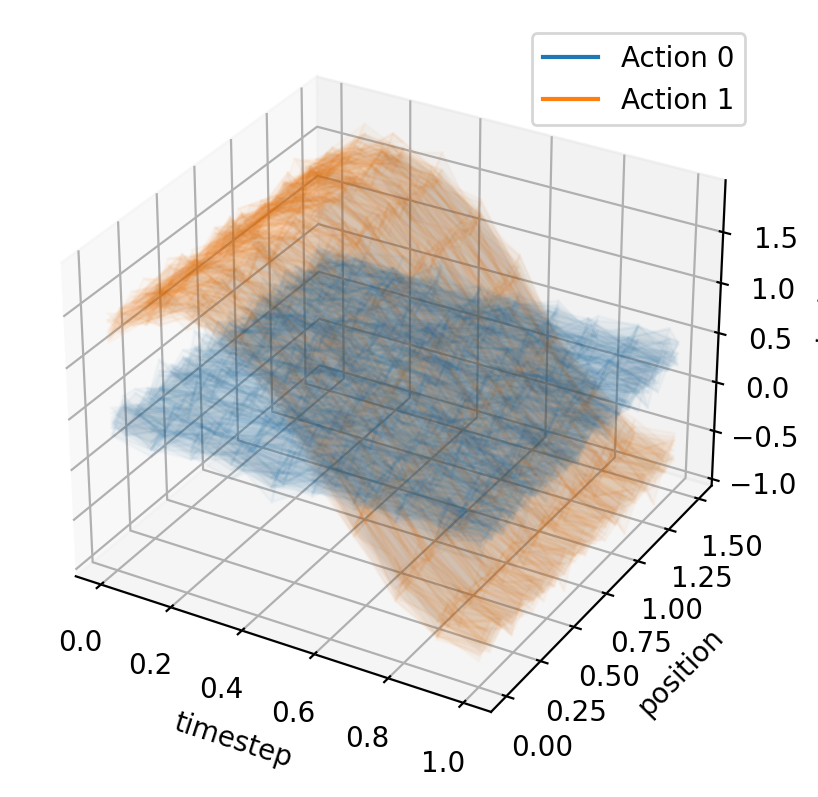

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for a_idx in range(n_action):
    for s_idx in range(10):  # Only plot 10 samples
        xt, xp = np.meshgrid(timestep, position)
        surf = ax.plot_surface(
            xt, xp, 
            force_satp[s_idx, a_idx].T,
            rstride=1, cstride=1, alpha=0.03, 
            color=f"C{a_idx}", edgecolor=f"C{a_idx}")
        #surf._edgecolors2d = surf._edgecolor3d   # So that ax.legend doesn't crash
        # surf._facecolors2d = surf._facecolor3d   # Thank you who? Thank you Matplotlib <3
    ax.plot([], [], color=f"C{a_idx}", label=f"Action {a_idx}")
ax.legend()

ax.set_xlabel('timestep')
ax.set_ylabel('position')
ax.set_zlabel('velocity')

plt.show()

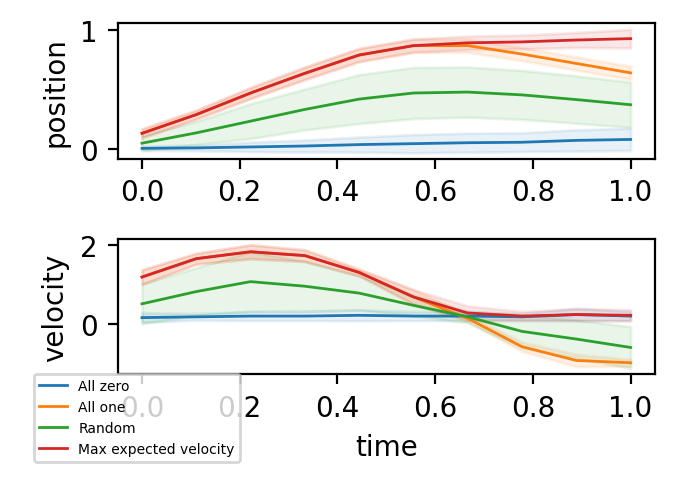

In [4]:
baselines = baseline.run()
plot.runs(*baselines, figsize=(3.5, 2.5))

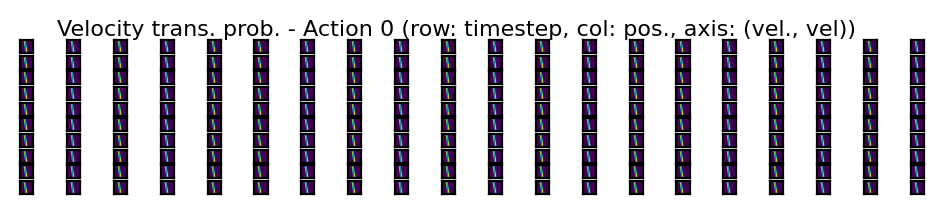

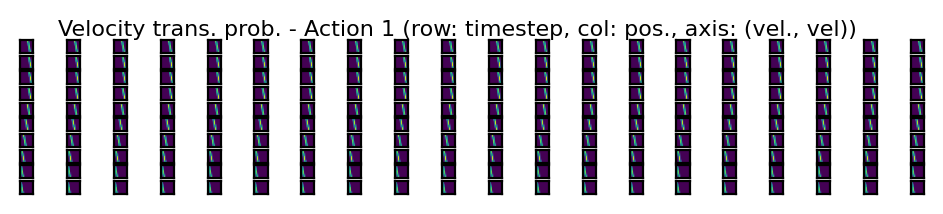

In [5]:
for a in range(n_action):
    fig, axes = plt.subplots(nrows=n_timestep, ncols=n_position, figsize=(6, 1))
    fig.suptitle(f'Velocity trans. prob. - Action {a} (row: timestep, col: pos., axis: (vel., vel))', fontsize=8)
    for t in range(n_timestep):
        for p in range(n_position):
            ax = axes[t, p]
            img = transition_velocity_atpvv[a, t, p, :, :]
            ax.imshow(img, aspect=1, vmin=0, vmax=1.0)
            ax.get_xaxis().set_ticks([])
            ax.axes.get_yaxis().set_ticks([])
    plt.show()

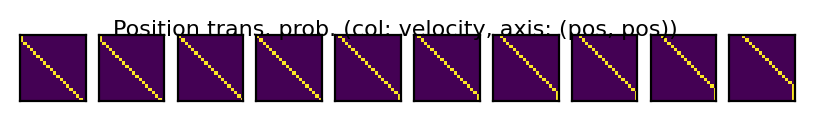

In [6]:
fig, axes = plt.subplots(ncols=n_velocity, figsize=(5, 0.5))
fig.suptitle("Position trans. prob. (col: velocity, axis: (pos, pos))", fontsize=8)
for i, ax in enumerate(axes):
    img = transition_position_pvp[:, i, :]
    ax.imshow(img, aspect=1)
    ax.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])